# Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")
print(data.shape)

(4119, 21)


In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [34]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Preprocesamiento

In [5]:
data["y"] = (data["y"]=="yes").astype(int)

In [6]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
data["education"] = np.where(data["education"]=='basic.4y', "basic", data["education"])
data["education"] = np.where(data["education"]=='basic.6y', "basic", data["education"])
data["education"] = np.where(data["education"]=='basic.9y', "basic", data["education"])

data["education"] = np.where(data["education"]=='high.school', "high_school", data["education"])
data["education"] = np.where(data["education"]=='professional.course', "professional_course", data["education"])
data["education"] = np.where(data["education"]=='university.degree', "university_degree", data["education"])

In [8]:
data["education"].unique()

array(['basic', 'high_school', 'university_degree', 'professional_course',
       'unknown', 'illiterate'], dtype=object)

# Exploracion

In [9]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [10]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [11]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
high_school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
professional_course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
university_degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


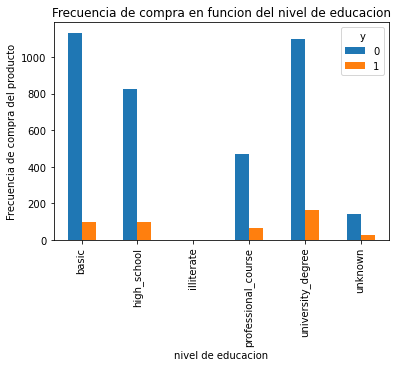

In [14]:
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("nivel de educacion")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

Text(0, 0.5, 'Proporcion de clientes')

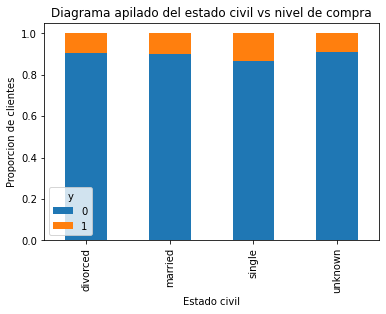

In [15]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado del estado civil vs nivel de compra")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")

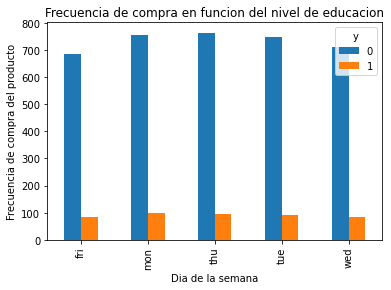

In [16]:
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

In [17]:
table=pd.crosstab(data.day_of_week, data.y)

In [18]:
table

y,0,1
day_of_week,,
fri,685,83
mon,757,98
thu,764,96
tue,750,91
wed,712,83


In [19]:
table.sum(1).astype(float)

day_of_week
fri    768.0
mon    855.0
thu    860.0
tue    841.0
wed    795.0
dtype: float64

In [20]:
table.div(table.sum(1).astype(float), axis=0)

y,0,1
day_of_week,,
fri,0.891927,0.108073
mon,0.885380,0.114620
thu,0.888372,0.111628
tue,0.891795,0.108205
wed,0.895597,0.104403


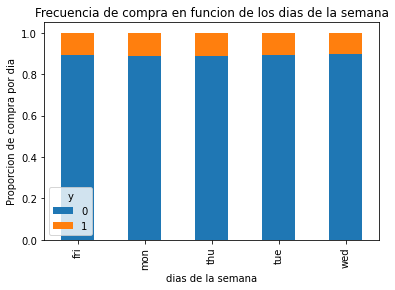

In [22]:
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en funcion de los dias de la semana")
plt.xlabel("dias de la semana")
plt.ylabel("Proporcion de compra por dia")
plt.show()

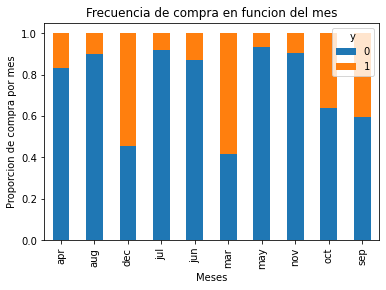

In [23]:
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("Meses")
plt.ylabel("Proporcion de compra por mes")
plt.show()

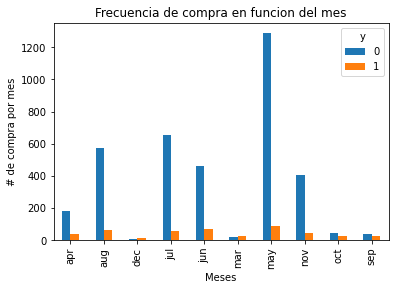

In [24]:
table=pd.crosstab(data.month, data.y)
table.plot(kind="bar")
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("Meses")
plt.ylabel("# de compra por mes")
plt.show()

Text(0, 0.5, 'Cliente')

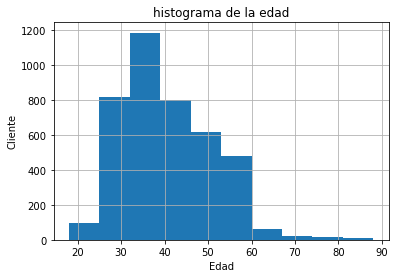

In [25]:
data.age.hist()
plt.title("histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

<AxesSubplot:xlabel='age'>

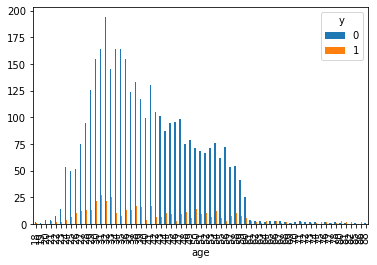

In [26]:
pd.crosstab(data.age, data.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

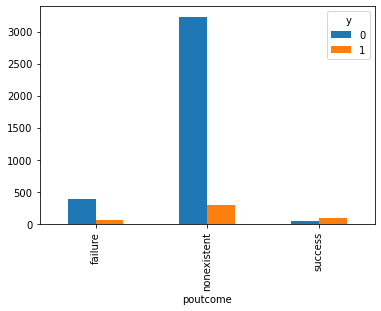

In [27]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

# Procesamiento parte 2

## Conversion de las variables categóricas a dummies

In [8]:
categories = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "poutcome"
]

In [9]:
for category in categories:
    cat_list = "cat_"+category
    cat_dummies=pd.get_dummies(data[category], prefix=category)
    dataN=data.join(cat_dummies)
    dataN.drop([category],axis=1,inplace=True)
    data=dataN

In [45]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic,education_high_school,education_illiterate,education_professional_course,education_university_degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [46]:
data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [10]:
bank_data_vars = data.columns.values.tolist()
Y = ["y"]
X = list(set(bank_data_vars) - set(Y))

# Seleccion de rasgos para el modelo

In [47]:
n = 12

In [11]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression(
    solver="lbfgs",#"liblinear",
    max_iter=5000
)

In [70]:
data[X].values

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [71]:
rfe = RFE(lr, n)
rfe = rfe.fit(data[X].values, data[Y].values)

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [72]:
print(rfe.support_)

[False False  True False False False False  True  True False False False
 False False False False  True False False False False False False  True
  True False False  True False False False False False  True False False
 False  True False  True  True False False False False False False False
 False False False False False False False False  True False False False
 False]


In [73]:
print(rfe.ranking_)

[10 14  1 23 15 35 22  1  1 20  4 17 36 41  8  9  1 42 26 31 30  5 19  1
  1 24 37  1 34 44 18 48  7  1 49 21 33  1  6  1  1 39 28 46 11 27  3 45
 38  2 40 12 13 16 32 25  1 50 47 29 43]


In [77]:
z=zip(bank_data_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 10),
 ('duration', False, 14),
 ('campaign', True, 1),
 ('pdays', False, 23),
 ('previous', False, 15),
 ('emp.var.rate', False, 35),
 ('cons.price.idx', False, 22),
 ('cons.conf.idx', True, 1),
 ('euribor3m', True, 1),
 ('nr.employed', False, 20),
 ('y', False, 4),
 ('job_admin.', False, 17),
 ('job_blue-collar', False, 36),
 ('job_entrepreneur', False, 41),
 ('job_housemaid', False, 8),
 ('job_management', False, 9),
 ('job_retired', True, 1),
 ('job_self-employed', False, 42),
 ('job_services', False, 26),
 ('job_student', False, 31),
 ('job_technician', False, 30),
 ('job_unemployed', False, 5),
 ('job_unknown', False, 19),
 ('marital_divorced', True, 1),
 ('marital_married', True, 1),
 ('marital_single', False, 24),
 ('marital_unknown', False, 37),
 ('education_basic', True, 1),
 ('education_high_school', False, 34),
 ('education_illiterate', False, 44),
 ('education_professional_course', False, 18),
 ('education_university_degree', False, 48),
 ('education_unknown

In [80]:
select_vars=[]
for x,y,w in zip(bank_data_vars, rfe.support_, rfe.ranking_):
    if y==True:
        select_vars.append(x)

In [81]:
select_vars

['campaign',
 'cons.conf.idx',
 'euribor3m',
 'job_retired',
 'marital_divorced',
 'marital_married',
 'education_basic',
 'default_no',
 'housing_unknown',
 'loan_no',
 'loan_unknown',
 'day_of_week_thu']

In [18]:
select_vars=["previous","euribor3m","job_blue-collar","job_retired","month_aug","month_dec",
            "month_jul","month_jun","month_mar","month_nov","day_of_week_wed","poutcome_nonexistent"]

In [19]:
X = data[select_vars]
Y = data["y"]

## Implementacion modelo statsmodel.api

In [12]:
import statsmodels.api as sm

In [102]:
logit_model=sm.Logit(Y,X)

In [103]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [104]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2021-04-05 13:34  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

## Implementacion del modelo en Python con sklearn

In [20]:
from sklearn import linear_model

In [21]:
logit_model=linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
logit_model.score(X,Y)

0.8958485069191552

In [109]:
1-Y.mean()

0.8905074047098811

In [110]:
pd.DataFrame(list(zip(X.columns,np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179381511]
1,euribor3m,[-0.5443670397996976]
2,job_blue-collar,[-0.35331387435015116]
3,job_retired,[0.36165159081107845]
4,month_aug,[0.629258889507326]
5,month_dec,[1.194397457212275]
6,month_jul,[0.9630554140669418]
7,month_jun,[1.0566897056471736]
8,month_mar,[1.6386680234596926]
9,month_nov,[0.45770841910617377]


# Validacion modelo logit

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [113]:
lm=linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

In [114]:
probs=lm.predict_proba(X_test)

In [115]:
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [116]:
prediction = lm.predict(X_test)

In [124]:
prob = probs[:,1]
probs_df=pd.DataFrame(prob, columns=["prob"])
threshold=0.15
probs_df["prediction"]=np.where(probs_df["prob"]>threshold,1,0)
probs_df.head()

,prob,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [125]:
pd.crosstab(probs_df.prediction, Y_test)

y,0,1
prediction,,
0,256,29
1,82,6


In [15]:
from sklearn import metrics

In [127]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

# Validazión cruzada

In [16]:
from sklearn.model_selection import cross_val_score

In [129]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy",cv=12)

In [130]:
scores.mean()

0.894388320112098

# Matrices de confusión y curvas ROC

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [25]:
lm=linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
probs=lm.predict_proba(X_test)

In [28]:
prob = probs[:,1]
probs_df=pd.DataFrame(prob, columns=["prob"])
threshold=0.15
probs_df["prediction"]=np.where(probs_df["prob"]>threshold,1,0)
probs_df["actual"] = list(Y_test)
probs_df.head()

,prob,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0


In [159]:
pd.crosstab(probs_df.prediction, probs_df.actual)

actual,0,1
prediction,,
0,869,46
1,245,76


In [160]:
confussion_matrix=pd.crosstab(probs_df.prediction, probs_df.actual)

In [163]:
TN=confussion_matrix[0][0]
FP=confussion_matrix[0][1]
TP=confussion_matrix[1][1]
FN=confussion_matrix[1][0]

In [164]:
TN, FP, TP, FN

(869, 245, 76, 46)

In [140]:
sens=TP/(TP+FN)
sens

0.2367601246105919

In [142]:
espec_1=1-(TN/(TN+FP))
espec_1

0.050273224043715814

In [167]:
ths = [x for x in np.arange(0.05,.95,0.03)]
sensitivities = [1]
especificities_1 = [1]
for t in ths:
    probs_df["prediction"] = np.where(probs_df["prob"]>=t,1,0)
    confussion_matrix=pd.crosstab(probs_df.prediction, probs_df.actual)
    TN=confussion_matrix[0][0]
    FP=confussion_matrix[0][1]
    TP=confussion_matrix[1][1]
    FN=confussion_matrix[1][0]
    
    sens=TP/(TP+FN)
    sensitivities.append(sens)
    espec_1=1-(TN/(TN+FP))
    especificities_1.append(espec_1)
sensitivities.append(1)
especificities_1.append(1)

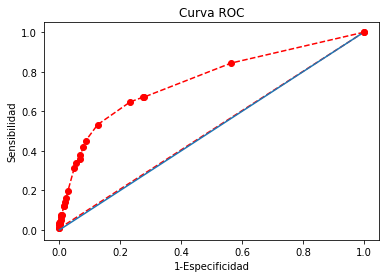

In [168]:
plt.plot(especificities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.show()

# Jugando con ggplot

In [1]:
from sklearn import metrics
from ggplot import *

In [29]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [32]:
df = pd.DataFrame({
    "1-Especificidad":espc_1,
    "Sensibilidad":sensit
})

In [33]:
df.head()

,1-Especificidad,Sensibilidad
0,0.000000,0.008197
1,0.000000,0.024590
2,0.000000,0.032787
3,0.002693,0.032787
4,0.002693,0.049180


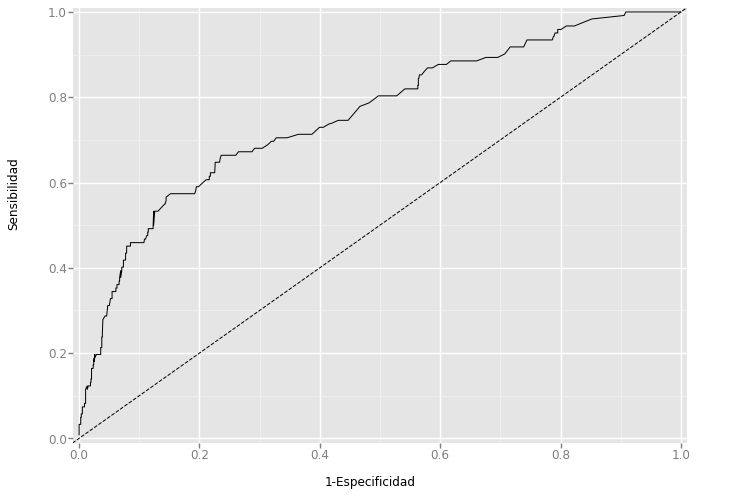

<ggplot: (136814365630)>

In [43]:
ggplot(df, aes(x="1-Especificidad",y="Sensibilidad"))+ \
    geom_line() + \
    xlim(-0.01,1.01)+ylim(-0.01,1.01)+\
    geom_abline(linetype="dashed")

In [37]:
auc = metrics.auc(espc_1,sensit)
auc

0.7575712982311564

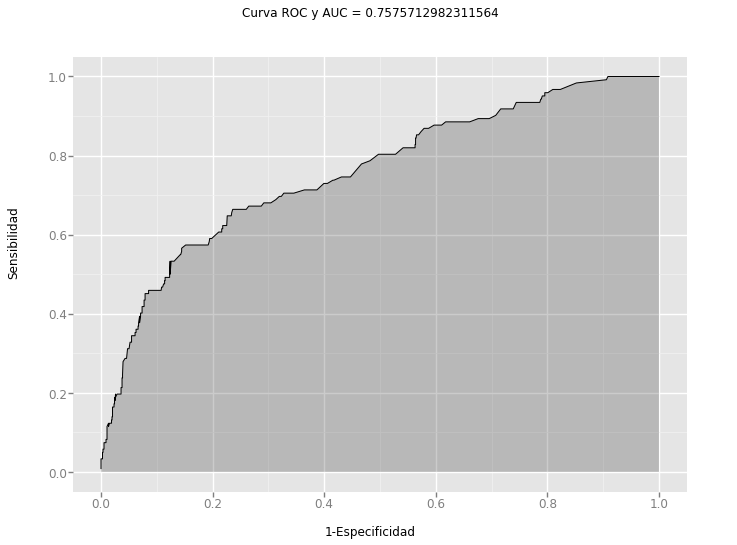

<ggplot: (136814300290)>

In [41]:
ggplot(df, aes(x="1-Especificidad",y="Sensibilidad"))+\
    geom_area(alpha=0.25)+\
    geom_line(aes(y="Sensibilidad"))+\
    ggtitle("Curva ROC y AUC = %s"%str(auc))